# ANALIZA PODATKOV: AVTO-MOTO DIRKE

Za projektno nalogo sem si izbrala analizo podatkov avto-moto dirk od začetkov beleženja uradnih dirk pa vse do konca oktobra 2018. Zbrala sem podatke o vseh dirkah, ki so potekale in bile zabeležene. Za vsako dirko sem zajela uradno ime dirke, prizorišče dirke, datum, prvenstvo in zmagovalca, če je le ta seveda sploh bil.

Projektna naloga bo strukturirana iz dveh delov. 
Prvi del, bo predstavil zbrane podatke o dirkah. Tu bo vključena predvsem:
        - število dirk v posameznih državah,
        - statistika po posameznih prvenstvih in 
        - priljubljenost dirk po različnih časovnih obdobjih.
V drugem delu, se bom bolj posvetila dirkačem. Predstavila bom:
        - uspešnosti dirkačev v različnih kategorijah,
        - uspešnost dirkačev v različnih državah ter
        - uspešnost dirkačev v različnih obdojih.
Ker je podatkov veliko, se bom pri vseh osredotočila le na tiste, ki jih imajo največ, saj s tem lahko pridobimo tudi najbolj realne podatke in primerjave.

In [2]:
import pandas as pd
import matplotlib.pyplot as mat
%matplotlib inline

dirke = pd.read_csv('avto-moto dirke csvji\dirke.csv', index_col='ime')

pd.options.display.max_rows = 20

Za začetek si oglejmo izbrane podatke.

In [3]:
dirke

,dirkalisce,drzava,leto,prvenstvo,zmagovalec
ime,,,,,
Mexican Grand Prix,Gran Premio de Mexico,MEX,2018,F1 World Championship,Max Verstappen
Australian MotoGP,Michelin Australian Motorcycle Grand Prix,AUS,2018,World Motorcycle Championship,Maverick Vinales
Martinsville NASCAR,First Data 500,USA,2018,Monster Energy NASCAR Cup,Joey Logano
Suzuka WTCR,Race of Japan - Race 2,JPN,2018,World Touring Car Cup,Rob Huff
Suzuka WTCR,Race of Japan - Race 3,JPN,2018,World Touring Car Cup,Gabriele Tarquini
Suzuka Super Formula,NaN,JPN,2018,Japanese Super Formula Championship,Naoki Yamamoto
Suzuka WTCR,Race of Japan - Race 1,JPN,2018,World Touring Car Cup,Kevin Ceccon
Japanese MotoGP,Motul Grand Prix of Japan,JPN,2018,World Motorcycle Championship,Marc Marquez
Kansas NASCAR,Hollywood Casino 400,USA,2018,Monster Energy NASCAR Cup,Chase Elliott


### POVEZANOST DRŽAV Z AVTO-MOTO DIRKAMI

Najprej se posvetimo dirkam in kje se je odvilo največ dirk, glede na državo in tudi glede na obdobje.

In [4]:
dirke["drzava"]

ime
Mexican Grand Prix               MEX
Australian MotoGP                AUS
Martinsville NASCAR              USA
Suzuka WTCR                      JPN
Suzuka WTCR                      JPN
Suzuka Super Formula             JPN
Suzuka WTCR                      JPN
Japanese MotoGP                  JPN
Kansas NASCAR                    USA
United States Grand Prix         USA
                                ... 
Nice-Castellane-Nice             FRA
Paris-Amsterdam                  FRA
Paris-Bordeaux                   FRA
Marseille-Hyeres-Nice            FRA
Paris-Trouville                  FRA
Paris-Dieppe                     FRA
Marseille-La Turbie-Marseille    FRA
Paris-Marseille                  FRA
Paris-Bordeaux                   FRA
Paris-Rouen                      FRA
Name: drzava, Length: 12863, dtype: object

In [5]:
drzave_dirk = dirke.groupby('drzava')

In [6]:
stevilo_dirk_po_drzavah = drzave_dirk.size().sort_values(ascending=False)

In [7]:
stevilo_dirk_po_drzavah

drzava
USA    5563
DEU     995
GBR     928
ITA     882
FRA     726
ESP     475
BEL     393
CAN     288
ZAF     211
NLD     205
       ... 
POL       4
URY       3
ROU       3
THA       3
IND       3
NOR       3
HKG       3
COL       2
CHL       1
CUW       1
Length: 57, dtype: int64

Dirke so bile v 57-ih različnih državah po svetu. Največ dirk do sedaj se je odvilo v Združenih državah Amerike (USA), z veliko manj dirkami ji sledita Nemčija (DEU) in Velika Britanija (GBR). Kurakao (CUW) in Čile (CHL) sta gostili samo eno dirko, z eno dirko več jima sledi Kolumbija (COL).

In [8]:
dirke['desetletje'] = 10 * (dirke.leto // 10)

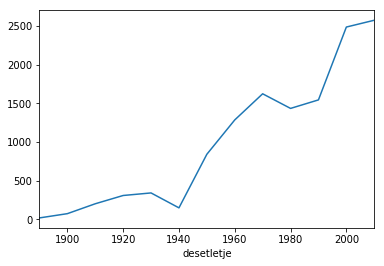

In [9]:
dirke.groupby('desetletje').size().plot()

Zgornji graf kaže odvisnost med obdobjem (desetletjem) in številom dirk. Opazimo, da število dirk skozi leta skoraj vedno narašča. Rahla padca sta bila le pred letom 1940, kar bi morda celo pripisala temu, da se je bližala 2. svetovna vojna, ter okoli leta 1970. V zadnjem desetletju, pa se je odvilo več kot 2500 dirk.

In [10]:
dirke.groupby('prvenstvo').size().sort_values(ascending=False).head(10)

prvenstvo
Non-championship                      1093
F1 World Championship                  992
NASCAR Grand National                  973
World Motorcycle Championship          649
Winston Cup                            567
AAA National Championship              493
Winston Cup Grand National             465
Deutsche Tourenwagen Meisterschaft     449
European F3 Championship               338
Sprint Cup                             324
dtype: int64

Če razvrstimo dirke po kategorijah, opazimo, da je bilo največ dirk odpeljanih v kategoriji Formule 1 (pri čemer seveda zanemarimo kategorijo, kjer prvenstvo ni določeno (Non-championship)). V Formuli 1 je bilo odpeljanih 992 dirk, z nekoliko manj dirkami ji sledi NASCAR in potem še Svetovno prvenstvo v motociklizmu (danes bolj znano kot MotoGP).

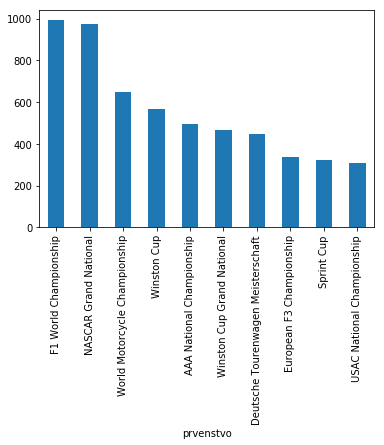

In [11]:
dirke.groupby('prvenstvo').size().sort_values(ascending=False)[1:11].plot.bar()

Za te 3 največja prvenstva, si oglejmo še, v katerih državah so njihove dirke najpogosteje odpeljane.

In [12]:
drzava_prvenstvo = pd.read_csv('avto-moto dirke obdelani podatki\drzava-prvenstvo.csv')

In [13]:
F1 = drzava_prvenstvo[drzava_prvenstvo.prvenstvo == 'F1 World Championship']
NASCAR = drzava_prvenstvo[drzava_prvenstvo.prvenstvo == 'NASCAR Grand National']
MotoGP = drzava_prvenstvo[drzava_prvenstvo.prvenstvo == 'World Motorcycle Championship']

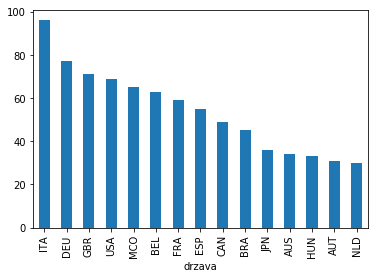

In [14]:
F1.groupby('drzava').size().sort_values(ascending=False).head(15).plot.bar()

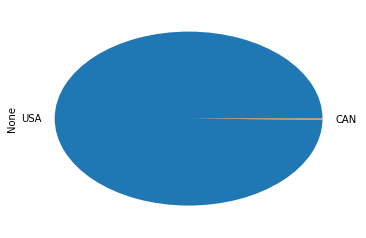

In [15]:
NASCAR.groupby('drzava').size().sort_values(ascending=False).plot.pie()

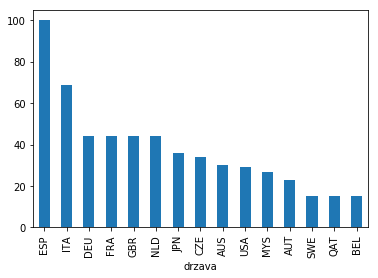

In [16]:
MotoGP.groupby('drzava').size().sort_values(ascending=False).head(15).plot.bar()

Ugotovili smo, da je bila Formula 1 odpeljana največkrat v Italiji, NASCAR v ZDA (tudi sicer je NASCAR potekal le v ZDA in Kanadi), Svetovno prvenstvo v motociklizmu pa je največkrat bilo v Španiji. Podatki niso presenetljivi, saj je je največja gledanost in zanimanje za te kategorije prav v državah, v katerih je tudi največ dirk.

### USPEŠNOST DIRKAČEV

V tem delu se želim bolj posvetiti zmagovalcem dirk.

In [17]:
splosna_uspesnost = dirke.groupby('zmagovalec').size().sort_values(ascending=False)

In [18]:
splosna_uspesnost

zmagovalec
Richard Petty         202
David Pearson         104
Michael Schumacher     94
Jeff Gordon            94
Lewis Hamilton         93
Valentino Rossi        89
Darrell Waltrip        85
Bobby Allison          84
Jimmie Johnson         83
Cale Yarborough        83
                     ... 
George Hammond          1
Peter Selsdon           1
George Connor           1
Geoffrey Ansell         1
Peter Terting           1
Peter Westbury          1
Geoff Boss              1
Peter Zakowski          1
Gaston Mazzacane        1
de Langhe               1
Length: 1936, dtype: int64

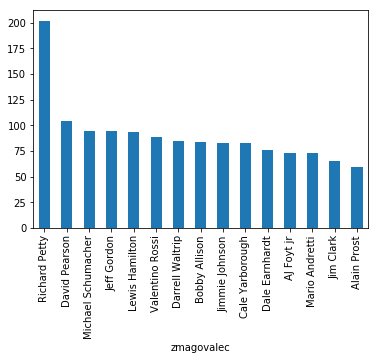

In [19]:
dirke.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkači (dirkači z največ zmagami) so Richard Petty, David Pearson in Michaell Schumacher. Razberemo pa lahko tudi, da je med 12863 zabeleženih dirk kar 1936 različnih zmagovalcev. Neverjetno pa je, koliko Richard Petty odstopa od vseh ostalih po številu zmag.

Poglejmo sedaj še uspešnost dirkačev v posameznih kategorija, v posameznih državah in na posameznih dirkališčih.

In [82]:
prvenstvo_zmagovalec = pd.read_csv('avto-moto dirke obdelani podatki\prvenstvo-zmagovalec.csv')

F1_z = prvenstvo_zmagovalec[prvenstvo_zmagovalec.prvenstvo == 'F1 World Championship']
NASCAR_z = prvenstvo_zmagovalec[prvenstvo_zmagovalec.prvenstvo == 'NASCAR Grand National']
MotoGP_z = prvenstvo_zmagovalec[prvenstvo_zmagovalec.prvenstvo == 'World Motorcycle Championship']

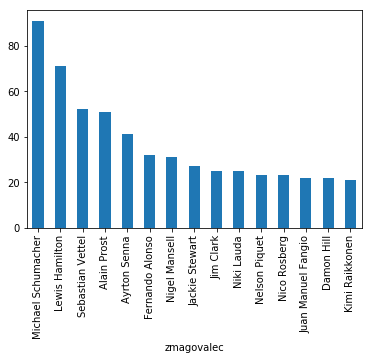

In [83]:
F1_z.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkač Formule 1 je Michael Schumacher, za njim sta Lewis Hamilton (aktualni svetovni prvak) in Lewis Vettel.

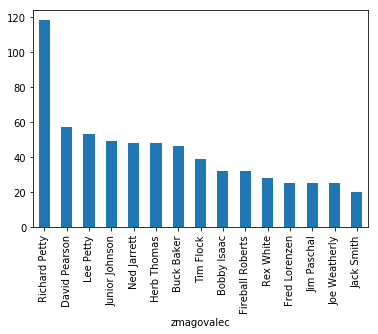

In [84]:
NASCAR_z.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkaš NASCAR-ja je Richard Petty, sledita pa mu David Pearson in Lee Petty. Trenutnega aktualnega prvaka Joeya Logana pa ni med najboljših 15 dirkačev.

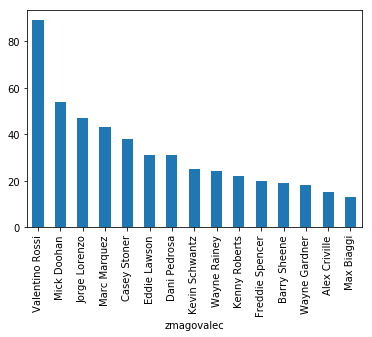

In [85]:
MotoGP_z.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkač vseh časov v kategoriji MotoGP je Valentino Rossi, drugi je Mick Doohan in treti Jorge Lorenzo. aktualni svetovni prvak Marc Marquez je četri najuspešnejši.

In [86]:
drzava_zmagovalec['win'] = 1

In [87]:
dirke.sort_values('zmagovalec').groupby(['desetletje', 'zmagovalec']).head(10).size().sort_values(ascending=False).head(20)

TypeError: 'numpy.int32' object is not callable

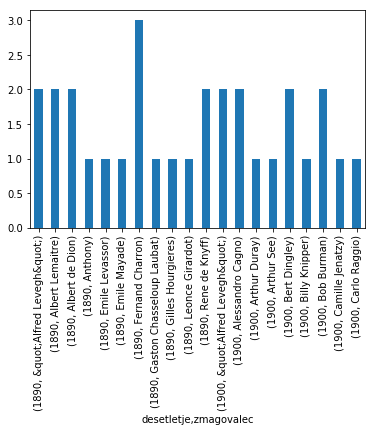

In [89]:
(dirke.sort_values('zmagovalec').groupby(['desetletje', 'zmagovalec']).size().head(20)).plot.bar()

In [91]:
(dirke.sort_values('zmagovalec').groupby(['desetletje', 'zmagovalec']).size().head(20) > 10)

desetletje  zmagovalec               
1890        &quot;Alfred Levegh&quot;    False
            Albert Lemaitre              False
            Albert de Dion               False
            Anthony                      False
            Emile Levassor               False
            Emile Mayade                 False
            Fernand Charron              False
            Gaston Chasseloup Laubat     False
            Gilles Hourgieres            False
            Leonce Girardot              False
            Rene de Knyff                False
1900        &quot;Alfred Levegh&quot;    False
            Alessandro Cagno             False
            Arthur Duray                 False
            Arthur See                   False
            Bert Dingley                 False
            Billy Knipper                False
            Bob Burman                   False
            Camille Jenatzy              False
            Carlo Raggio                 False
dtype: bool

In [52]:
dirke.sort_values('zmagovalec').groupby('zmagovalec').count().sort_valeus()

AttributeError: 'DataFrame' object has no attribute 'sort_valeus'

In [103]:
drzava_zmagovalec = pd.read_csv('avto-moto dirke obdelani podatki\drzava-zmagovalec.csv')

Zda = drzava_zmagovalec[drzava_zmagovalec.drzava == 'USA']
Nem = drzava_zmagovalec[drzava_zmagovalec.drzava == 'DEU']
Ang = drzava_zmagovalec[drzava_zmagovalec.drzava == 'GBR']
Ita = drzava_zmagovalec[drzava_zmagovalec.drzava == 'ITA']
Spa = drzava_zmagovalec[drzava_zmagovalec.drzava == 'ESP']

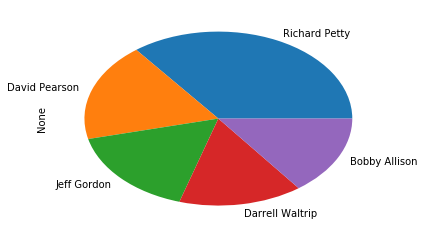

In [111]:
Zda.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

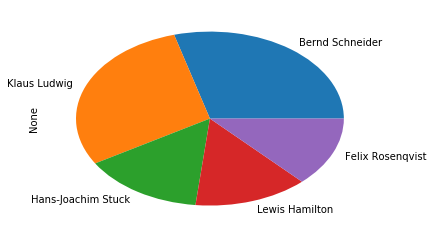

In [112]:
Nem.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

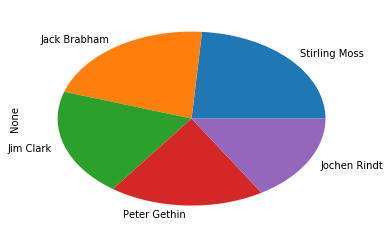

In [113]:
Ang.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

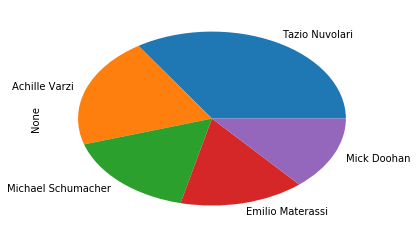

In [114]:
Ita.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

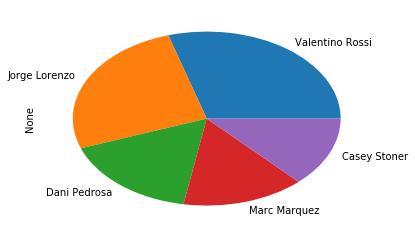

In [110]:
Spa.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

Pregledala sem statistiko petih najboljših dirkačev v izbranih petih državah (Združene države Amerike, Nemčija, Anglija, Italija in Španija). Vidimo lahko, da velikih odstopanj ni, da bi bili nekateri dirkači velik boljši v določenih državah. Treba pa je povdariti, da če se odvijajo dirke nekega prvenstva v malo različnih državah, je seveda toliko večja verjetnost, da bo dirkač, ki dirka v tej kategoriji uspešen v eni izmed teh držav. Kot primer izpostavljenega, lahko vidimo dirkača NASCARja Richarda Pettya, ki je nastopal skoraj da le v ZDA, za razliko od drugih dirkačev (na primer Formule 1 in MotoGPja), kjer dirke potekajo v več različnih državah skozi celo dirkaško sezono.
Kot drugi tak primer pa je Španija, kjer na grafu petih najboljših dirkačev, lahko zasledimo same dirkače MotoGPja. Torej je očitno v Španiji zares priljubljen motociklizem, zaradi česar je posledično tam tudi več dirk te kategorije, in seveda s tem pride tudi večja verjetnost zmage dirkača MotoGP v Španiji.